<h1> <b>CMPE 297-SEC 98: Project Submission<br></b>
<h3>Topic: Text to Image Generation</h3>

---


<p>Team Name: The Seekers<br>
<p>Team Members:<br>
Sithara KrishnaMurthy, sithara.krishnamurthy@sjsu.edu<br>
Vidhi Shah, vidhirajesh.shah@sjsu.edu<br>
Pragya Gautam, pragya.gautam@sjsu.edu<br>
Reetika Goel, reetika.goel@sjsu.edu<br>



# Problem Statement

<b>Proposal: <br></b>
In the world of computer vision, natural language descriptions can be tricky in automatically generating images. It is still a fundamental problem to generate fine-grained high-quality images just based on text descriptions. With the help of Generative Adversarial Networks (GANs), this project reviews and represents  methodology that have been implemented to <b>generate realistic images based on text descriptions</b>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#DataSet

*   The model is currently trained on the flowers dataset. Download the images from http://www.robots.ox.ac.uk/~vgg/data/flowers/102/ and save them in Data/flowers/jpg. 
*   The dataset consists of 8189 images of 102 flower categories
*   Each image has ten text captions that describe the image of the flower in different ways. For that, download the captions from https://drive.google.com/file/d/0B0ywwgffWnLLcms2WWJQRFNSWXM/view. Extract the archive, copy the text_c10 folder and paste it in Data/flowers

*   The code to unzip the dataset is available under UnzipData.ipynb

# Visualization of DataSet

In [0]:
os.chdir("/content/drive/Shared drives/Emerging Technologies/Project/Data/flowers/jpg")

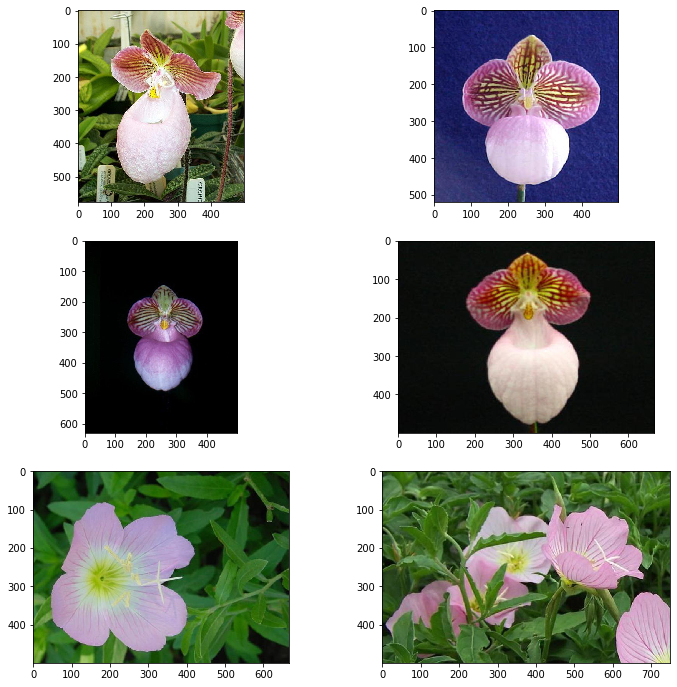

In [0]:
img1 = mpimg.imread('image_05087.jpg')
img2 = mpimg.imread('image_05094.jpg')
img3 = mpimg.imread('image_05100.jpg')
img4 = mpimg.imread('image_05142.jpg')
img5 = mpimg.imread('image_06735.jpg')
img6 = mpimg.imread('image_06771.jpg')
images = []
images.append(img1)
images.append(img2)
images.append(img3)
images.append(img4)
images.append(img5)
images.append(img6)
w=10
h=10
fig=plt.figure(figsize=(12, 12))
columns = 2
rows = 3
index = 0
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[index])
    index+=1
plt.show()

the flower has petals that are pale pink or white with white stamen
this flower is pink and white in color, with petals that have darker veins
this flower has petals that are pink with yellow stigma

a curved pink flower with white filament resting atop a green pedicel
the petals of the flower are pink in color and have green leaves
this flower is pink in color, and has petals that are very thin and heart shaped
the petals are pink with prominent darker pink veins and yellow-white stamen
this flower has petals of pale pinkish lavendar veined with a deeper purple and greenish centers
this flower consists of lavender pedals with long white stamen
this flower has petals that are pink and has yellow stamen





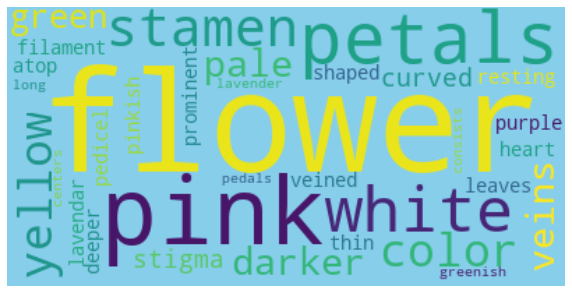

In [0]:
# lower max_font_size, change the maximum number of word and lighten the background:
f = open('image_06771.txt', "r")
for line in f:
    print(line.split(".")[0])
f.close()
print("\n")

text=open("image_06771.txt").read()
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="skyblue").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

this flower has large pink petals and a long yellow stigma in the center of it

the flower petals are light ourple in color with yellow larger anthers

this flower has petals that are pink with yellow and brown lines

this flower is pink and purple in color, with petals that are striped
the flower shown has purple and white petals with a yellow pollen tube

the bright orange pistil of this flower is surrounded by pink petals with dark red or brown lines on them
this flower has wide and rounded pink petals surrounding a purple and brown patterned center
this flower has four purple petals with a bit of yellow and brown veining
this flower has pink petals that has purple and yellow lines on them

the top 3 petals are purple, brown and yellow-green patterned, with the 4th, bottom petal being light purple, a small yellow stigma in the center




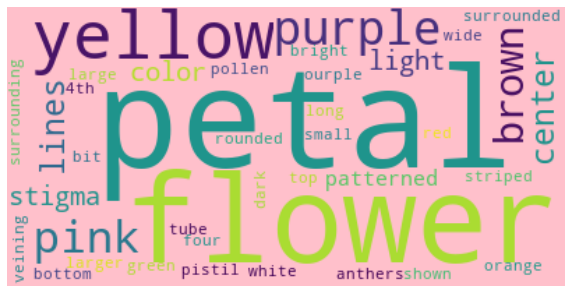

In [0]:
# lower max_font_size, change the maximum number of word and lighten the background:
f = open('/content/drive/Shared drives/Emerging Technologies/Project/Data/flowers/text_c10/class_00002/image_05089.txt', "r")
for line in f:
    print(line.split(".")[0])
f.close()
print("\n")

text=open("/content/drive/Shared drives/Emerging Technologies/Project/Data/flowers/text_c10/class_00002/image_05089.txt").read()
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="pink").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# DataSet Split Strategy
*   We split the dataset into distinct training and test sets. It has 82 train+validation and 20 test classes. We used 5 captions per image for training. 
*   During mini-batch selection for training we randomly pick an image view (e.g. crop,ip) of the image and one of the captions. For text features, we first pre-trained a deep convolutional recurrent text encoder on embedding of text captions with GoogLeNet image embedings. We also used char-CNN-RNN. The text encoder produced 1024 dimensional embeddings that were projected to 128 dimensions in both the generator and discriminator
*   The training image size was set to 32 * 32 * 3. We have compressed the
images from 500 * 500 * 3 to the set size so that the training process would be
fast.

# Architecture
The main idea for generative adversarial networks is to learn two networks- a Generator network G which tries to generate images, and a Discriminator network D, which tries to distinguish between ’real’ and ’fake’ generated images.<br>

<b>We have used deep convolutional generative adversarial network (DC-GAN) flavor of GAN networks in this project</b> and below is the description of the network architecture explained in one of the papers related to the text-to-image synthesis.<br>
*   Both the generator network G and the discriminator network D perform feed-forward inference conditioned on the text features. 
*   The encoded text description em-bedding is first compressed using a fully-connected layer to a small dimension.
*   It is followed by a leaky-ReLU and then concatenated to the noise vector z sampled in the Generator G. 
*   The following steps are same as in a generator network; feed-forward through the deconvolutional network, and generate a synthetic image conditioned on text query and noise sample.

![alt image](https://imgur.com/fpAz7RD.png)

# Run Environment & System Configuration

<b>We run our entire deep learning model under Google Cloud platform (GCP)</b><br> Below are the steps we took to achieve the same. Several screenshots are also provided below supporting the work done.
*   Setup Google account using free $300 credits provided by Google
*   Create a new project
*   Deployed <b>deep learning virtual machine having 1 GPU of type NVIDIA Tesla T4 and 16vCPUs with 104 GB RAM</b>
*   Initialized Google SDK on our machines to create an SSH connection
*   Using deployment manager we hit the localhost:8080 button to lauch the Jupyter Lab GUI within GCP and ran our entire code there


![alt image](https://imgur.com/pF7hKUd.png)

![alt image](https://imgur.com/cYcexV5.png)

![alt image](https://imgur.com/TxkcZbM.png)

#Implementation





Below are the list of main code files used in the project along with their brief description:
## dcgan.py:
This class has functions to create a model, load the model and fit model.

## img_cap_loader.py:
This class loads images and categories for text and creates an array of the corresponding image and text.

## glove_loader.py
GloVe, coined from Global Vectors, is a model for distributed word representation. The model is an unsupervised learning algorithm for obtaining vector representations for words. This is achieved by mapping words into a meaningful space where the distance between words is related to semantic similarity. Training is performed on aggregated global word-word co-occurance statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. It is developed as an open-source project at Stanford.

## dcgan_train.py:
The main class which loads the data, trains the model using the data, saves the model and also generates snapshots during training.

## dcgan_generate.py:
This class has function to load images as well as text and normalize them for the GAN model.

In [0]:
!python3 'dcgan_train.py'

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1024)         205824      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1024)         103424      input_2[0][0]      

#Limitations

*   We wanted to train our model with DC-GAN for 1000 epochs
*   All networks are trained using SGD with batch size 128, a base learning rate of 0.0005, and ADAM solver with momentum 0.5
*   Model run initially started good taking a minute per epoch. But with increasing number of model complexity and limitations of having single GPU on GCP, average run time per epoch increased drastically to 4-5 minutes per epoch
*   Hence, we were able to train our model uptill 150 epochs till now and it is still in progress

# Generating Images

<b>Example Text description:<br></b>
This white and yellow flower has thin white petals and a round yellow stamen.<br><br>
<b>Generated Images:</b><br>
![alt image](https://imgur.com/Csc1xZM.png)

In [0]:
# Run this section to avoid AllowPickle = False error.
# !pip install numpy==1.16.2
# import numpy as np
# print(np.__version__)

The dcgan_genrate.py class randomly chooses 10 texts and generates 3 images for each text.

In [0]:
#!python3 'dcgan_generate.py'
!python '/content/drive/Shared drives/Vijay/txt-img/dcgan_generate.py'

Using TensorFlow backend.
{'text_input_dim': 100, 'img_height': 32, 'img_width': 32, 'random_input_dim': 200, 'glove_source_dir_path': './very_large_data', 'img_channels': 3}






Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1024)         205824      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (D

#Result

<b>A few examples of text descriptions and their corresponding outputs that have been generated through our GAN can be seen below:</b>

In [0]:
os.chdir("/content/drive/Shared drives/Vijay/txt-img/data/outputs")

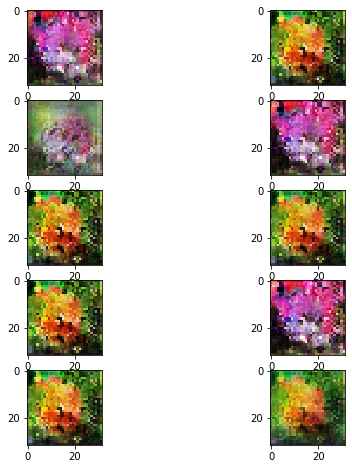

In [0]:
img1 = mpimg.imread('dc-gan-generated-0-0.png')
img2 = mpimg.imread('dc-gan-generated-1-0.png')
img3 = mpimg.imread('dc-gan-generated-2-0.png')
img4 = mpimg.imread('dc-gan-generated-3-0.png')
img5 = mpimg.imread('dc-gan-generated-4-0.png')
img6 = mpimg.imread('dc-gan-generated-5-0.png')
img7 = mpimg.imread('dc-gan-generated-6-0.png')
img8 = mpimg.imread('dc-gan-generated-7-0.png')
img9 = mpimg.imread('dc-gan-generated-8-0.png')
img10 = mpimg.imread('dc-gan-generated-9-0.png')
images = []
images.append(img1)
images.append(img2)
images.append(img3)
images.append(img4)
images.append(img5)
images.append(img6)
images.append(img7)
images.append(img8)
images.append(img9)
images.append(img10)
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 5
index = 0
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[index])
    index+=1
plt.show()

<h4> <b>Snapshots generated on training model for 151 epochs.</b></h4>

In [0]:
os.chdir("/content/drive/Shared drives/Vijay/txt-img/data/snapshots 150 epochs")

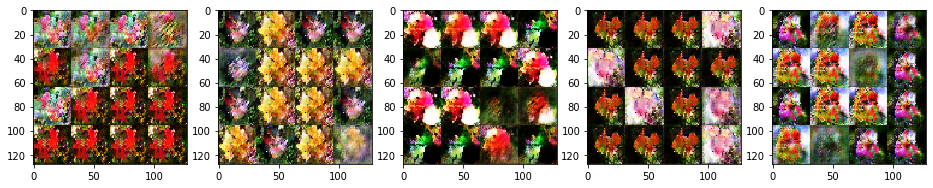

In [0]:
img1 = mpimg.imread('dc-gan-150-500.png')
img2 = mpimg.imread('dc-gan-151-84.png')
img3 = mpimg.imread('dc-gan-151-184.png')
img4 = mpimg.imread('dc-gan-151-284.png')
img5 = mpimg.imread('dc-gan-151-384.png')
images = []
images.append(img1)
images.append(img2)
images.append(img3)
images.append(img4)
images.append(img5)
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 5
rows = 1
index = 0
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[index])
    index+=1
plt.show()

**Actual snapshots obtained on training the model for 1000 epochs.**
![alt text](https://imgur.com/uYFxSnA.png)

#Conclusion

<b>In this project we made an attempt to explore techniques and architectures to
achieve the goal of automatically synthesizing images from text descriptions.
We implemented simple architectures like the DC-GAN and played around
with it a little to have our own conclusions of the results. We would like to
mention here that the results which we have obtained for the given problem
statement were on a very basic configuration of resources. Better results can be
expected with higher congurations of resources like more number of GPUs or TPUs.


#References

*   Reed, Scott, et al. "Generative adversarial text to image synthesis." arXiv
preprint arXiv:1605.05396 (2016).
*   https://medium.com/datadriveninvestor/text-to-image-synthesis-6e5de1bf86ec

